In [3]:
import polars as pl
import os
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:
def plot_player_comparison(player_1_stats, player_2_stats, stats_name):
    
    
    # Nombres de las categorías
    categories = ["Recov", "AerLost", "AerWon", "PKcon", "TklW", "Fls", "CrdR",
                  "CarProg", "Int", "BlkPass", "Blocks"]
    
    # Número de categorías
    qty_cats = len(stats_name)
    
    # Ángulo del primer vértice del hexágono
    initial_angle = np.linspace(0, 2*np.pi, qty_cats, endpoint=False).tolist()
    
    # Añadir el primer vértice al final para cerrar el hexágono
    initial_angle += initial_angle[:1]
    
    # Valores del primer jugador
    player_1_stats += player_1_stats[:1]
    
    # Valores del segundo jugador
    player_2_stats += player_2_stats[:1]
    
    # Crear la figura y el gráfico
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Dibujar el hexágono para el primer jugador
    ax.plot(initial_angle, player_1_stats, linewidth=2, linestyle='solid', label='Jugador 1')
    ax.fill(initial_angle, player_1_stats, 'b', alpha=0.1)
    
    # Dibujar el hexágono para el segundo jugador
    ax.plot(initial_angle, player_2_stats, linewidth=2, linestyle='solid', label='Jugador 2')
    ax.fill(initial_angle, player_2_stats, 'r', alpha=0.1)
    
    # Configurar las etiquetas de las categorías
    ax.set_xticks(initial_angle[:-1])
    ax.set_xticklabels(stats_name)
    
    # Añadir una leyenda
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    # Mostrar el gráfico
    plt.title('Comparación de habilidades de jugadores')
    plt.show()

### Chusmeando los datos

In [28]:
data = pl.read_csv("data/2022-2023_Football_Player_Stats.csv", encoding="'ISO-8859-1", separator=";")

In [35]:
data.filter(data["90s"]<1).to_pandas()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,6,Oliver Abildgaard,DEN,MF,Hellas Verona,Serie A,26,1996,1,0,11,0.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,30.0,66.7,310.0,90.0,10.00,10.00,100.0,10.0,10.0,100.0,0.00,10.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,30.0,30.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,10.00,0.00,0.00,10.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10.00,0.00,0.0,50.0,0.00,20.0,20.0,10.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,10.00,0.0,0.0,0.0,10.00,0.00,10.00,0.0
1,13,Mohamed Achi,FRA,FW,Nantes,Ligue 1,21,2002,2,0,36,0.4,0,2.5,0.0,0.0,0.0,0.0,26.1,0.0,0.0,0.0,45.0,52.5,85.7,685.0,190.0,17.50,17.50,100.0,25.0,30.0,83.3,0.00,2.50,0.0,0.0,2.5,2.50,0.0,0.0,7.5,52.5,50.0,2.50,0.00,0.0,0.0,2.5,0.0,2.5,0.0,2.5,0.0,45.0,0.0,0.0,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.50,2.50,2.50,0.00,0.0,2.50,2.50,100.0,0.0,0.0,0.0,0.0,0.0,2.50,0.00,0.0,62.5,0.00,10.0,27.5,25.0,0.0,62.5,2.5,0.0,0.0,2.5,100.0,52.5,335.0,187.5,5.0,5.0,0.0,0.0,2.5,47.5,2.5,0.0,0.0,0.0,5.0,0.00,0.0,2.5,2.50,0.0,0.0,0.0,5.00,0.00,0.00,0.0
2,27,Felix Agu,GER,DFFW,Werder Bremen,Bundesliga,23,1999,3,0,49,0.5,0,2.0,0.0,0.0,0.0,0.0,15.9,0.0,0.0,0.0,32.0,50.0,64.0,598.0,288.0,8.00,10.00,80.0,18.0,20.0,90.0,4.00,12.00,33.3,0.0,2.0,2.00,2.0,0.0,4.0,50.0,38.0,12.00,0.00,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,32.0,0.0,4.0,8.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,2.0,2.0,0.0,0.0,2.00,0.00,0.0,66.0,2.00,14.0,26.0,28.0,4.0,66.0,6.0,0.0,0.0,4.0,66.7,38.0,330.0,48.0,0.0,4.0,0.0,2.0,4.0,38.0,4.0,0.0,0.0,0.0,6.0,6.00,0.0,2.0,0.00,0.0,2.0,0.0,6.00,2.00,2.00,50.0
3,32,Naouirou Ahamada,FRA,MFFW,Crystal Palace,Premier League,20,2002,2,0,16,0.2,0,5.0,0.0,0.0,0.0,0.0,17.3,0.0,0.0,0.0,50.0,70.0,71.4,760.0,225.0,25.00,30.00,83.3,25.0,35.0,71.4,0.00,0.00,0.0,0.0,0.0,10.00,0.0,0.0,5.0,70.0,70.0,0.00,0.00,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,5.0,0.0,5.0,0.0,0.00,0.00,0.0,85.0,0.00,10.0,60.0,15.0,10.0,85.0,5.0,5.0,100.0,0.0,0.0,40.0,165.0,60.0,5.0,0.0,5.0,5.0,0.0,55.0,20.0,0.0,0.0,0.0,0.0,0.00,5.0,5.0,0.00,0.0,0.0,0.0,10.00,0.00,0.00,0.0
4,34,Amar Ahmed,SWE,FW,Troyes,Ligue 1,18,2004,1,0,20,0.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,50.0,60.0,395.0,90.0,15.00,25.00,60.0,10.0,20.0,50.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,5.0,50.0,50.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,0.00,5.00,0.0,0.00,5.00,0.0,5.0,0.0,0.0,0.0,5.0,10.00,0.00,0.0,90.0,0.00,15.0,40.0,35.0,0.0,90.0,5.0,5.0,100.0,0.0,0.0,60.0,370.0,105.0,0.0,5.0,0.0,20.0,10.0,60.0,10.0,0.0,0.0,0.0,5.0,5.00,0.0,0.0,5.00,0.0,0.0,0.0,10.00,0.00,15.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [30]:
profile_cols = ["Player", "Nation", "Pos", "Squad", "Age", ""]
defensive_stats_cols = ["Recov", "AerLost", "AerWon", "PKcon", "TklW",
                        "Fls", "CrdR","CarProg", "Int", "BlkPass", "Blocks"]
cols_of_interest = profile_cols+defensive_stats_cols

In [31]:
defensive_data = data.select(cols_of_interest)

In [32]:
defensive_data

Player,Nation,Pos,Squad,Age,Recov,AerLost,AerWon,PKcon,TklW,Fls,CrdR,CarProg,Int,BlkPass,Blocks
str,str,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Brenden Aarons…","""USA""","""MFFW""","""Leeds United""",22,4.86,1.19,0.34,0.0,0.51,0.62,0.0,1.53,0.06,1.58,1.69
"""Yunis Abdelham…","""MAR""","""DF""","""Reims""",35,6.64,1.23,2.18,0.0,1.59,1.32,0.0,0.55,2.0,1.45,2.23
"""Himad Abdelli""","""FRA""","""MFFW""","""Angers""",23,8.14,1.05,0.93,0.0,1.4,1.74,0.0,2.56,0.93,1.4,1.51
"""Salis Abdul Sa…","""GHA""","""MF""","""Lens""",22,6.6,0.5,0.5,0.0,0.8,2.45,0.0,1.25,1.1,0.95,1.3
"""Laurent Aberge…","""FRA""","""MF""","""Lorient""",30,6.51,0.39,0.31,0.0,2.02,0.93,0.0,0.47,1.16,1.16,1.4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Szymon ?urkows…","""POL""","""MF""","""Fiorentina""",25,5.0,2.5,2.5,0.0,0.0,2.5,0.0,7.5,0.0,0.0,0.0
"""Szymon ?urkows…","""POL""","""MF""","""Spezia""",25,30.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0
"""Martin Ødegaar…","""NOR""","""MF""","""Arsenal""",24,5.19,0.7,0.48,0.0,0.7,1.02,0.0,2.78,0.16,0.37,0.48


In [33]:
defensive_data.to_pandas()

,Player,Nation,Pos,Squad,Age,Recov,AerLost,AerWon,PKcon,TklW,Fls,CrdR,CarProg,Int,BlkPass,Blocks
0,Brenden Aaronson,USA,MFFW,Leeds United,22,4.86,1.19,0.34,0.0,0.51,0.62,0.0,1.53,0.06,1.58,1.69
1,Yunis Abdelhamid,MAR,DF,Reims,35,6.64,1.23,2.18,0.0,1.59,1.32,0.0,0.55,2.00,1.45,2.23
2,Himad Abdelli,FRA,MFFW,Angers,23,8.14,1.05,0.93,0.0,1.40,1.74,0.0,2.56,0.93,1.40,1.51
3,Salis Abdul Samed,GHA,MF,Lens,22,6.60,0.50,0.50,0.0,0.80,2.45,0.0,1.25,1.10,0.95,1.30
4,Laurent Abergel,FRA,MF,Lorient,30,6.51,0.39,0.31,0.0,2.02,0.93,0.0,0.47,1.16,1.16,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Szymon ?urkowski,POL,MF,Fiorentina,25,5.00,2.50,2.50,0.0,0.00,2.50,0.0,7.50,0.00,0.00,0.00
2685,Szymon ?urkowski,POL,MF,Spezia,25,30.00,0.00,0.00,0.0,0.00,0.00,0.0,10.00,10.00,0.00,0.00
2686,Martin Ødegaard,NOR,MF,Arsenal,24,5.19,0.70,0.48,0.0,0.70,1.02,0.0,2.78,0.16,0.37,0.48
2687,Milan ?uri?,BIH,FW,Hellas Verona,32,2.05,3.59,14.50,0.0,0.13,1.92,0.0,0.13,0.00,0.26,0.64


In [37]:
defensive_data.filter(defensive_data["Player"]=="Virgil van Dijk")

Player,Nation,Pos,Squad,Age,Recov,AerLost,AerWon,PKcon,TklW,Fls,CrdR,CarProg,Int,BlkPass,Blocks
str,str,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Virgil van Dij…","""NED""","""DF""","""Liverpool""",31,5.58,0.73,2.67,0.06,0.18,0.36,0.0,0.48,1.15,0.42,0.91


In [42]:
santiago_bueno_stats = defnsive_data[defnsive_data["Player"] == "Santiago Bueno"][defensive_stats_cols].values.tolist()[0]

In [43]:
van_dijk_stats = defnsive_data[defnsive_data["Player"] == "Virgil van Dijk"][defensive_stats_cols].values.tolist()[0]

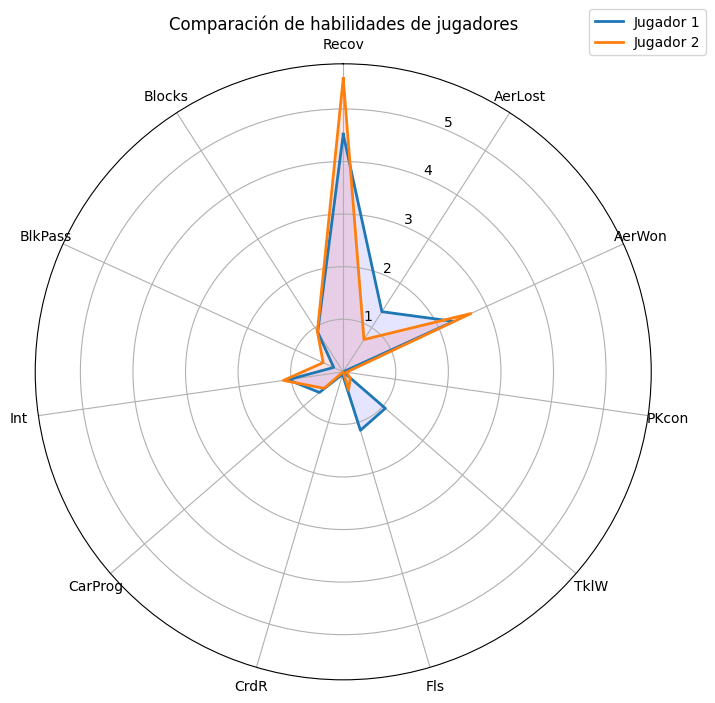

In [44]:
plot_player_comparison(santiago_bueno_stats, van_dijk_stats, defensive_stats_cols)